# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# **Load Data**

In [2]:
data =  pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **Perform EDA**

In [3]:
# Null values
data.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# **Visualize Data**

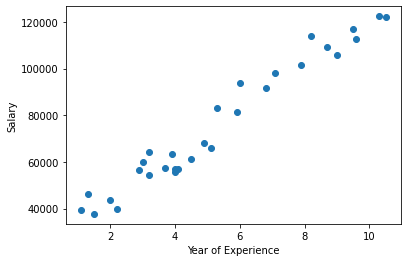

In [6]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [7]:
#Prepare data
X = data.drop('Salary',axis=1)
y = data['Salary']

In [8]:
X.shape , y.shape

((30, 1), (30,))

In [9]:
#split the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape ,Y_train.shape,Y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [10]:
# define linearRegression Model

In [11]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
#Test model

In [13]:
pred = lr.predict(X_test)
pred

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

In [14]:
Y_test

20     91738.0
24    109431.0
7      54445.0
18     81363.0
2      37731.0
27    112635.0
Name: Salary, dtype: float64

In [15]:
#check actual data,predicted data and difference between the actual and predicted data

In [16]:
diff  = Y_test - pred

In [17]:
pd.DataFrame(np.c_[Y_test,pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,91738.0,90235.221726,1502.778274
1,109431.0,108172.103010,1258.896990
2,54445.0,56249.551925,-1804.551925
3,81363.0,81738.804276,-375.804276
4,37731.0,40200.763408,-2469.763408
5,112635.0,116668.520460,-4033.520460


In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)
y = y.reshape(len(y),1)
print(y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(x_test)



[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]
[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#visualize model ,that how it is performing on training data


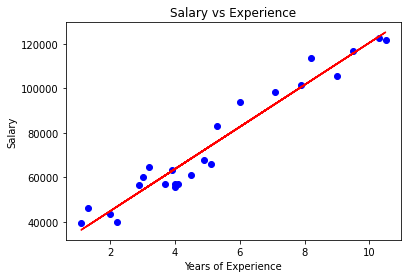

In [20]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red') 
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

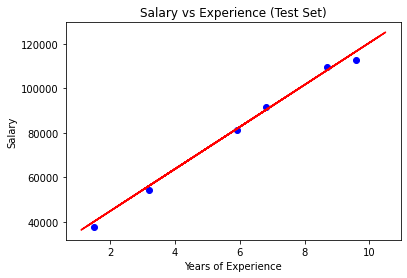

In [21]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red') 
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [22]:
#evaluate


In [23]:
lr.score(X_test,Y_test)

0.993422386435995

In [24]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)

In [25]:
rmse,r2


(2221.4792095558773, 0.993422386435995)

In [26]:
#Test on the custom data

In [27]:
exp =  3
lr.predict([[exp]])[0]
print(f"salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

salary of 3 year experience employee = 54361 thousands


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
exp =  5

lr.predict([[exp]])[0]
print(f"salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

salary of 5 year experience employee = 73242 thousands


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
